In [4]:
import ROOT
h = ROOT.TH1D(name="h", title="My histo", nbinsx=100, xlow=-5, xup=5)


h.FillRandom("gaus", ntimes=5000)

In [5]:
f2 = ROOT.TF2("f2", "sin(x*x - y*y)", xmin=-2, xmax=2, ymin=-2, ymax=2)

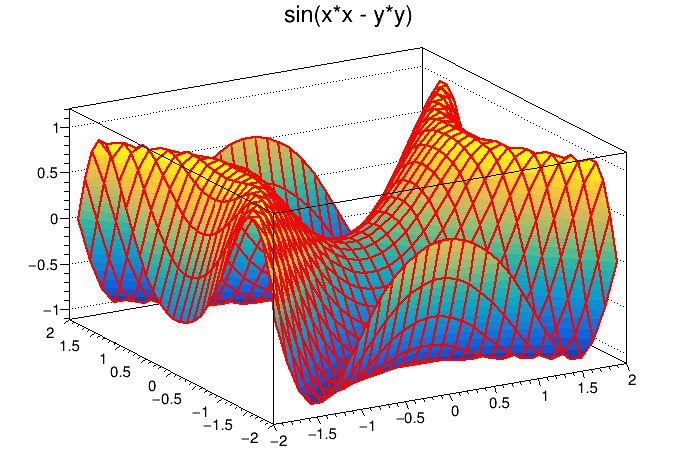

In [6]:
c = ROOT.TCanvas()
f2.Draw("surf1") # to get a surface instead of the default contour plot
c.Draw()

In [7]:
%%cpp

double gaussian(double *x, double *par) {
    return par[0]*TMath::Exp(-TMath::Power(x[0] - par[1], 2.) / 2.)
           / TMath::Sqrt(2 * TMath::Pi());
}

In [8]:
fitFunc = ROOT.TF1("fitFunc", ROOT.gaussian, xmin=-5, xmax=5, npar=2)

In [9]:
res = h.Fit(fitFunc, "S") # the "S" option makes the function return a fit result object

 FCN=57.2302 FROM MIGRAD    STATUS=CONVERGED      84 CALLS          85 TOTAL
                     EDM=1.50813e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.94933e+02   7.04040e+00   1.52523e-01  -2.41096e-05
   2  p1           1.73741e-02   1.43240e-02  -5.90061e-05   5.32789e-02


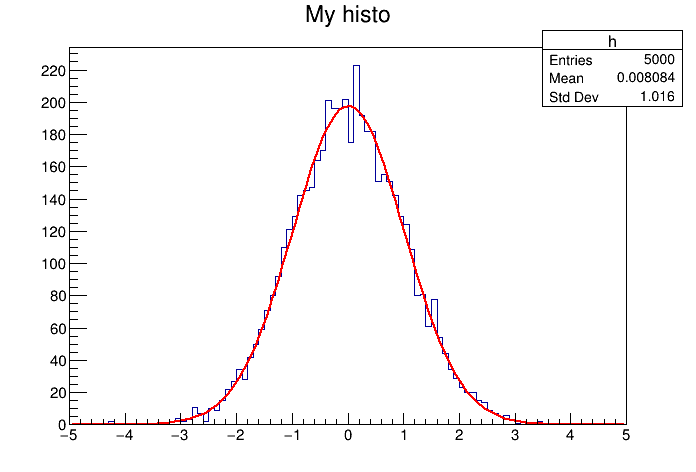

In [10]:
c2 = ROOT.TCanvas()
h.Draw()
c2.Draw()

In [11]:
res = h.Fit("gaus", "S")

 FCN=57.2152 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=4.29295e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.97699e+02   3.46743e+00   1.04762e-02  -5.09285e-06
   2  Mean         1.72236e-02   1.43534e-02   5.32907e-05   6.52923e-04
   3  Sigma        9.98726e-01   1.03911e-02   1.03595e-05   3.69420e-03


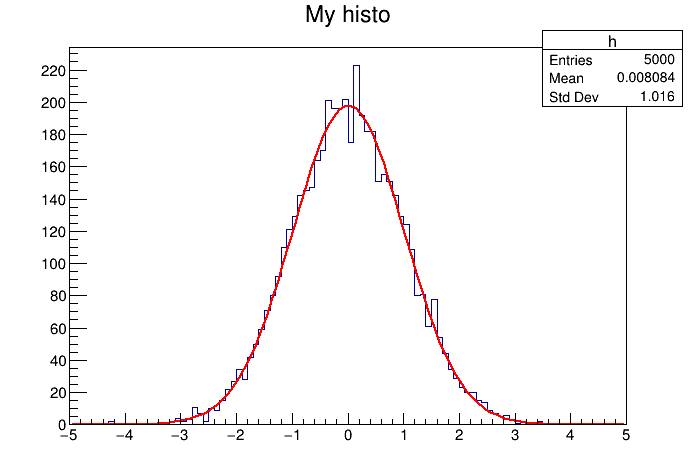

In [12]:
c3 = ROOT.TCanvas()
h.Draw()
c3.Draw()

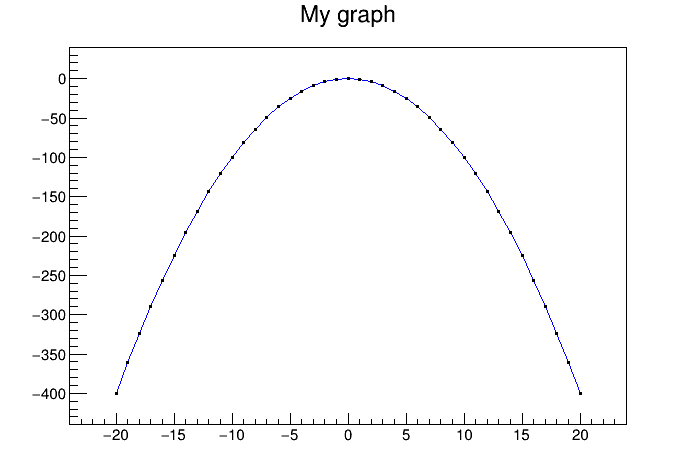

In [13]:
g = ROOT.TGraph()

for x in range(-20, 21):
    y = -x*x
    g.AddPoint(x, y)

c4 = ROOT.TCanvas()
g.SetMarkerStyle(7)
g.SetLineColor(ROOT.kBlue)
g.SetTitle("My graph")
g.Draw()
c4.Draw()

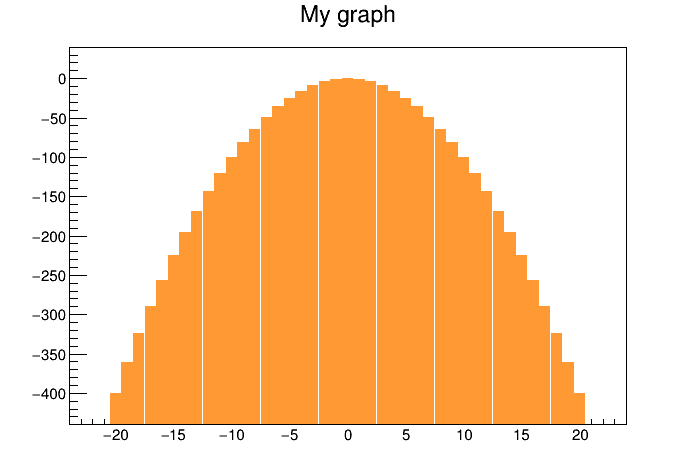

In [14]:
c5 = ROOT.TCanvas()
g.SetTitle("My graph")
g.SetFillColor(ROOT.kOrange + 1) # base colors can be tweaked by adding/subtracting values to them 
g.Draw("AB1")
c5.Draw()

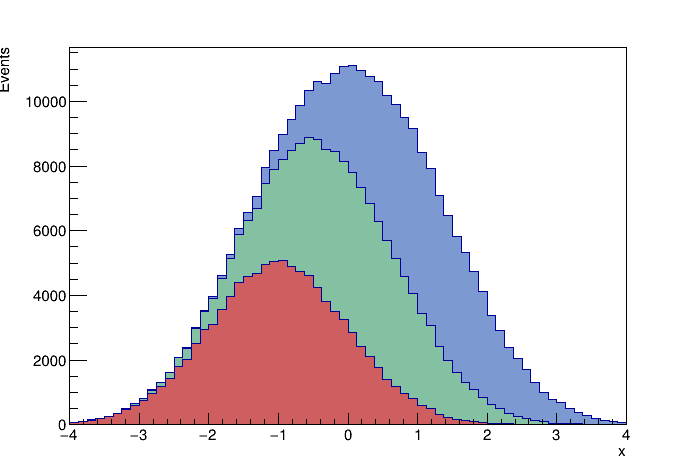

In [15]:
f1 = ROOT.TF1("f1", "gaus", -4.0, 4.0)

histos = [ROOT.TH1D(f"h{i}", "x", 64, -4.0, 4.0) for i in range(3)]

hs = ROOT.THStack("hs","")
hs.SetTitle(";x;Events")

colors = [46, 30, 38]
        
for i in range(len(histos)):
    h = histos[i]
    f1.SetParameters(1.0, i - 1, 1.0)
    h.FillRandom("f1", 100000)
    h.SetFillColor(colors[i])
    hs.Add(h)

c6 = ROOT.TCanvas()
hs.Draw()
c6.Draw()

In [16]:
h_pass = ROOT.TH1D("h_pass", "My histogram", 50, 0, 100.0)
h_total = ROOT.TH1D("h_total", "My histogram", 50, 0, 100.0)

f_gaus = ROOT.TF1("f_gaus", "gaus", 0, 100.0)

f_gaus.SetParameters(1.0, 56.0, 20.0)
h_pass.FillRandom("f_gaus", 40000)
h_pass.SetLineColor(ROOT.kRed)
f_gaus.SetParameters(1.0, 50.0, 20.0)
h_total.FillRandom("f_gaus", 100000)


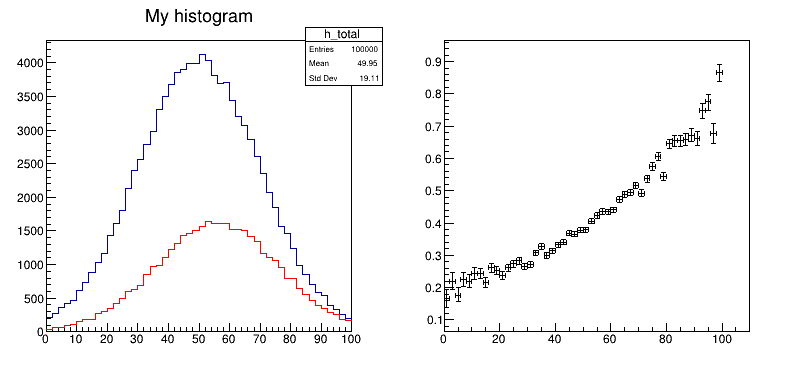

In [17]:
teff = ROOT.TEfficiency(h_pass,h_total)

c7 = ROOT.TCanvas("rf101_basics", "rf101_basics", 800, 400)
c7.Divide(2)
c7.cd(1)
h_total.Draw()
h_pass.Draw("SAME")
c7.cd(2)
teff.Draw()
c7.Draw()

In [18]:
f = ROOT.TFile("my_file.root", "RECREATE")

In [19]:
f.Close()

In [20]:
f = ROOT.TFile("my_file.root", "RECREATE")

h = ROOT.TH1F("my_histo", "Example histogram", 100, -4, 4)
f.WriteObject(h, h.GetName())

f.Close()

In [21]:
%%bash
ls -l my_file.root

-rw-r--r--  1 kimgeonwoo  staff  3792 Jun  5 11:06 my_file.root


In [22]:
%%bash
rootls -l my_file.root

TH1F  Jun 05 11:06 2024 my_histo;1 "Example histogram" 


In [23]:
f = ROOT.TFile("my_file.root") # READ is the default mode

h = f.Get("my_histo")
print(h)

Name: my_histo Title: Example histogram NbinsX: 100


In [24]:
%%bash
rootls -l Downloads/example_file.root

TTree  Aug 25 14:32 2021 dataset;1 "dataset" 


In [26]:
treename = "dataset"
filename = "Downloads/example_file.root"
df = ROOT.RDataFrame(treename, filename)

print(f"Columns in the dataset: {df.GetColumnNames()}")

Columns in the dataset: { "a", "b", "vec1", "vec2" }


In [27]:
def1 = df.Define("c", "a+b")

fil1 = def1.Filter("c < 0.5")

count = fil1.Count()
mean = fil1.Mean("c")
display = fil1.Display(["a","b","c"])

print(f"Number of rows after filter: {count.GetValue()}")
print(f"Mean of column c after filter: {mean.GetValue()}")
print("Dataset contents:")
display.Print()

Number of rows after filter: 111
Mean of column c after filter: 0.38583512997804337
Dataset contents:
+-----+------------+-------------+------------+
| Row | a          | b           | c          | 
+-----+------------+-------------+------------+
| 11  | 0.28843593 | 0.042303163 | 0.33073909 | 
+-----+------------+-------------+------------+
| 13  | 0.25636993 | 0.12553929  | 0.38190921 | 
+-----+------------+-------------+------------+
| 30  | 0.11045690 | 0.31782435  | 0.42828125 | 
+-----+------------+-------------+------------+
| 92  | 0.26561222 | 0.17973985  | 0.44535206 | 
+-----+------------+-------------+------------+
| 107 | 0.20609357 | 0.17557919  | 0.38167276 | 
+-----+------------+-------------+------------+


In [28]:
%%time
df1 = df.Filter("a >= 0.2")

# Book in advance all Mean operations on the dataset columns
cols = df.GetColumnNames()
mean_ops = [df1.Mean(col) for col in cols]

# Ask the result of one mean operation.
# RDataFrame will process the whole computation graph
print(f"Number of RDataFrame runs so far: {df.GetNRuns()}")
print(f"First mean result is: {mean_ops[0].GetValue()}")
print(f"Number of RDataFrame runs so far: {df.GetNRuns()}")

Number of RDataFrame runs so far: 1
First mean result is: 14.285753153246043
Number of RDataFrame runs so far: 2
CPU times: user 614 ms, sys: 48.3 ms, total: 662 ms
Wall time: 682 ms


In [29]:
%%time
# Print all results, the event loop won't be run another time
for col, mean_op in zip(cols, mean_ops):
    print(f"Mean value of {col}: {mean_op.GetValue()}")
print(f"Number of RDataFrame runs so far: {df.GetNRuns()}")

Mean value of a: 14.285753153246043
Mean value of b: 0.5107120234035626
Mean value of vec1: 0.35305373042684285
Mean value of vec2: -0.0048903633967354275
Number of RDataFrame runs so far: 2
CPU times: user 175 µs, sys: 72 µs, total: 247 µs
Wall time: 245 µs


In [30]:
%jsroot on
c = ROOT.TCanvas()
h = df.Histo1D("vec1")
h.Draw()
c.Draw()

In [31]:
histo_name = "histo_name"
histo_title = "histo_title"
nbinsx = 100
xlow = -10
xup = 10

# The traditional TH1D constructor
# ROOT.TH1D(histo_name, histo_title, nbinsx, xlow, xup)

# With RDataFrame
c = ROOT.TCanvas()
h = df.Histo1D((histo_name, histo_title, nbinsx, xlow, xup), "vec1")
h.Draw()
c.Draw()

In [32]:
%%html
<style>
  th { font-size: 30px }
  td { font-size: 30px }
</style>

In [33]:
treename = "myDataset"
filename = "Downloads/collections_dataset.root"
df = ROOT.RDataFrame(treename, filename)

print(f"Columns in the dataset: {df.GetColumnNames()}")

Columns in the dataset: { "E", "nPart", "px", "py" }


In [34]:
npy_dict = df.AsNumpy(["E"])

for row, vec in enumerate(npy_dict["E"]):
    print(f"\nRow {row} contains:\n{vec}")


Row 0 contains:
{ 130000.01, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.93957090, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.93957090, 0.93827999, 0.93827999, 0.94612722, 0.94297180, 106159.91, 15555.974, 6246.4774, 782.95749, 1078.1841, 156.45323, 19.615241, 11711.961, 3844.0119, 308.88227, 474.07518, 868.16056, 210.02367, 142.94919, 13.504043, 13.399446, 2.8028640, 3.4129314, 258.32027, 215.75487, 58.913799, 809.24677, 2.5890092, 0.21385537, 9.3892520 }

Row 1 contains:
{ 130000.01, 0.93957090, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.93827999, 0.93957090, 0.93827999, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.94332697, 0.95194039, 0.94053839, 0.94349328, 0.93838184, 0.94539411, 0.93998250, 122217.22, 7395.7245, 2.1671104, 5.9762938, 61.247334, 84.256846, 202.08447, 28.955872, 74804.566, 47412.649, 3880.0412, 987.79319, 2527.8902, 1.3687218, 0.79838852, 1.2935306, 1.5876441, 3.0951194, 9.1041150, 75.152736, 21981.881, 25430.768, 3265.6709, 614.37035, 97

In [35]:
df1 = df.Define("good_pt", "sqrt(px*px + py*py)[E>100]")

In [36]:
c = ROOT.TCanvas()
h = df1.Histo1D(("pt", "pt", 16, 0, 4), "good_pt")
h.Draw()
c.Draw()

In [37]:
df = ROOT.RDataFrame("dataset","Downloads/example_file.root")
df1 = df.Define("c","a+b")

out_treename = "outtree"
out_filename = "outtree.root"
out_columns = ["a","b","c"]
snapdf = df1.Snapshot(out_treename, out_filename, out_columns)

In [38]:
%%bash
rootls -lt outtree.root

TTree  Jun 05 11:09 2024 outtree;1 "outtree" 
  a  "a/D"  16071
  b  "b/D"  16071
  c  "c/D"  16071
  Cluster INCLUSIVE ranges:
   - # 0: [0, 1999]
  The total number of clusters is 1


In [39]:
snapdf.Display().Print()

+-----+------------+------------+------------+
| Row | a          | b          | c          | 
+-----+------------+------------+------------+
| 0   | 0.97771140 | 0.99974175 | 1.9774531  | 
+-----+------------+------------+------------+
| 1   | 2.2802012  | 0.48497361 | 2.7651748  | 
+-----+------------+------------+------------+
| 2   | 0.56348245 | 0.39231399 | 0.95579645 | 
+-----+------------+------------+------------+
| 3   | 3.0421559  | 0.33353925 | 3.3756951  | 
+-----+------------+------------+------------+
| 4   | 28.574399  | 0.64812557 | 29.222524  | 
+-----+------------+------------+------------+


In [40]:
df = ROOT.RDataFrame("sig_tree", "https://root.cern/files/Higgs_data.root")

filter1 = df.Filter("lepton_eta > 0", "Lepton eta cut")
filter2 = filter1.Filter("lepton_phi < 1", "Lepton phi cut")

rep = df.Report()
rep.Print()

Lepton eta cut: pass=4880       all=10000      -- eff=48.80 % cumulative eff=48.80 %
Lepton phi cut: pass=3842       all=4880       -- eff=78.73 % cumulative eff=38.42 %


In [41]:
%%cpp

float asfloat(unsigned long long entrynumber){
    return entrynumber;
}

In [42]:
%%cpp

float square(float val){
    return val * val;
}

In [43]:
# Create a new RDataFrame from scratch with 100 consecutive entries
df = ROOT.RDataFrame(100)

# Create a new column using the previously declared C++ functions
df1 = df.Define("a", "asfloat(rdfentry_)")
df2 = df1.Define("b", "square(a)")

In [44]:
# Show the two columns created in a graph
c = ROOT.TCanvas()
graph = df2.Graph("a","b")
graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.5)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetTitle("My graph")
graph.Draw("AP")
c.Draw()

In [45]:
%%time
# Get a first baseline measurement

treename = "Events"
filename = "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/Run2012BC_DoubleMuParked_Muons.root"
df = ROOT.RDataFrame(treename, filename)

df.Sum("nMuon").GetValue()

CPU times: user 3.65 s, sys: 278 ms, total: 3.93 s
Wall time: 13.5 s


149322456.0

In [46]:
%%time
# Activate multithreading capabilities
# By default takes all available cores on the machine
ROOT.EnableImplicitMT()

treename = "Events"
filename = "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/Run2012BC_DoubleMuParked_Muons.root"
df = ROOT.RDataFrame(treename, filename)

df.Sum("nMuon").GetValue()

# Disable implicit multithreading when done
ROOT.DisableImplicitMT()

CPU times: user 3.44 s, sys: 123 ms, total: 3.56 s
Wall time: 13.5 s


In [47]:
import numpy
import ROOT

np_dict = {colname: numpy.random.rand(100) for colname in ["a","b","c"]}

df = ROOT.RDF.FromNumpy(np_dict)

print(f"Columns in the RDataFrame: {df.GetColumnNames()}")

Columns in the RDataFrame: { "a", "b", "c" }


In [48]:
co = df.Count()
m_a = df.Mean("a")

fil1 = df.Filter("c < 0.7")
def1 = fil1.Define("d", "a+b+c")
h = def1.Histo1D("d")

c = ROOT.TCanvas()
h.Draw()

print(f"Number of rows in the dataset: {co.GetValue()}")
print(f"Average value of column a: {m_a.GetValue()}")
c.Draw()

Number of rows in the dataset: 100
Average value of column a: 0.46959156210040764


In [49]:
# Export the modified dataframe to a dictionary of numpy arrays

np_dict_mod = def1.AsNumpy()

np_dict_mod

{'a': ndarray([0.01578135, 0.10201638, 0.4701619 , 0.98780943, 0.17661683,
          0.01570084, 0.13551332, 0.58176421, 0.053955  , 0.56812212,
          0.2929961 , 0.04615479, 0.28627604, 0.2414199 , 0.63036324,
          0.10857238, 0.17744498, 0.3630472 , 0.10640661, 0.59112001,
          0.23402697, 0.86034835, 0.01926514, 0.04828758, 0.3826797 ,
          0.32928288, 0.27011591, 0.28430911, 0.93898809, 0.84049238,
          0.85983683, 0.58556865, 0.37691047, 0.67230742, 0.44864737,
          0.37429084, 0.47998108, 0.01405887, 0.47461441, 0.51026495,
          0.77081194, 0.53809634, 0.32503468, 0.67979203, 0.82769072,
          0.31626998, 0.25798637, 0.09429036, 0.16428345, 0.74521517,
          0.85029075, 0.86405368, 0.99554571, 0.45951869, 0.89758597,
          0.1503262 , 0.90485575, 0.59518696, 0.10805953, 0.46174303,
          0.23467775, 0.52791523, 0.04552657, 0.72330563, 0.52516523,
          0.66604181, 0.42228439, 0.92288224, 0.83870417, 0.52700453,
          0.364

In [62]:
ROOT.EnableImplicitMT()
treename1 = "myDataset"
filename1 = "Downloads/collections_dataset.root"
treename2 = "dataset"
filename2 = "Downloads/example_file.root"

df1 = ROOT.RDataFrame(treename1, filename1)
df2 = ROOT.RDataFrame(treename2, filename2)
h1 = df1.Histo1D("px")
h2 = df2.Histo1D("a")
 

ROOT.RDF.RunGraphs((h1, h2))
ROOT.DisableImplicitMT()

In [63]:
c = ROOT.TCanvas()
h1.Draw()
c.Draw()

In [64]:
c = ROOT.TCanvas()
h2.Draw()
c.Draw()

In [65]:
df = ROOT.RDataFrame(5).Define("x", "42")
df.Display().Print()

+-----+----+
| Row | x  | 
+-----+----+
| 0   | 42 | 
+-----+----+
| 1   | 42 | 
+-----+----+
| 2   | 42 | 
+-----+----+
| 3   | 42 | 
+-----+----+
| 4   | 42 | 
+-----+----+


In [66]:
df = df.Redefine("x", "x * 10")
df.Display().Print()

+-----+-----+
| Row | x   | 
+-----+-----+
| 0   | 420 | 
+-----+-----+
| 1   | 420 | 
+-----+-----+
| 2   | 420 | 
+-----+-----+
| 3   | 420 | 
+-----+-----+
| 4   | 420 | 
+-----+-----+


In [67]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=2, threads_per_worker=1, processes=True, memory_limit="2GiB")
client = Client(cluster)

In [68]:
# Use a Dask RDataFrame
RDataFrame = ROOT.RDF.Experimental.Distributed.Dask.RDataFrame

df = RDataFrame("h42",
                "https://root.cern/files/h1big.root",
                npartitions=4,
                daskclient=client)

In [69]:
%%time
df1 = df.Filter("nevent > 1")
df2 = df1.Define("mpt","sqrt(xpt*xpt + ypt*ypt)")
c = df.Count()
m = df2.Mean("mpt")
print(f"Number of events after processing: {c.GetValue()}")
print(f"Mean of column 'mpt': {m.GetValue()}")

Number of events after processing: 283813
Mean of column 'mpt': 0.13190819625023323
CPU times: user 365 ms, sys: 135 ms, total: 499 ms
Wall time: 15.6 s
